In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.float_format = "{:,.2f}".format
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import warnings
warnings.simplefilter("ignore")

In [2]:
#user defined functions
def extract_categorycode(input_text,level=0):
    '''
     this function splits category code and returns the first part.
    '''
    output_text=input_text.split('.')[level]
    return output_text

def create_clusters(input_data_frame,input_columns,n_cluster):
    '''
     This function creates clusters and cluster labels.
    '''
    from sklearn.cluster import KMeans
    X=input_data_frame[input_columns].values
    k_means=KMeans(n_clusters=n_cluster,random_state=15).fit(X)
    return k_means.labels_

In [3]:
dataset = pd.read_csv("log_data_clean.csv")
dataset.head()

,Unnamed: 0,user_id,event,timestamp,date_cd
0,0,576409,StartLoanApply,2022-03-25 11:12:09,2022-03-25
1,1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,2022-03-25
2,2,72878,EndLoanApply,2022-03-25 11:14:44,2022-03-25
3,3,645317,OpenApp,2022-03-25 11:15:09,2022-03-25
4,4,645317,UseLoanManage,2022-03-25 11:15:11,2022-03-25


In [4]:
dataset['timestamp']=pd.to_datetime(dataset['timestamp'])
dataset['event']=dataset['event'].astype('category')

In [6]:
#creating a summary table for general overview
daily_summary_table=dataset.groupby(by=[dataset['timestamp'].dt.normalize()]).agg(Number_of_daily_visits=('date_cd',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
StartLoanApply=dataset['event']=='StartLoanApply'
sales=dataset.loc[StartLoanApply].groupby(by=[dataset['timestamp'].dt.normalize()]).agg(number_of_daily_sales=('event','count'),
                                                                                    
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['timestamp'],
                          right_on=['timestamp'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

Daily Visits Statistics
--------------------------------------------------
count   122.00
mean      1.00
std       0.00
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       1.00
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Visit Statistics by Dates
--------------------------------------------------
           count  mean  std  min  25%  50%  75%  max
timestamp                                           
Friday     17.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00
Monday     17.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00
Saturday   17.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00
Sunday     17.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00
Thursday   18.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00
Tuesday    18.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00
Wednesday  18.00  1.00 0.00 1.00 1.00 1.00 1.00 1.00


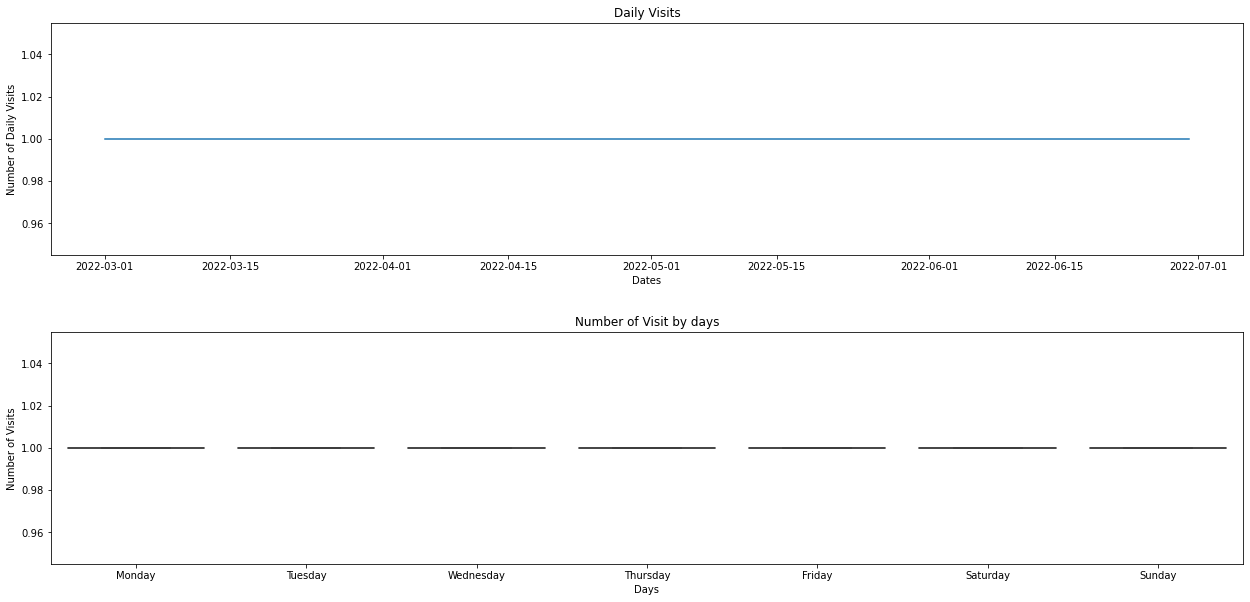

In [7]:
#Daily Visits
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['timestamp'].dt.day_name())['Number_of_daily_visits'].describe())

#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='timestamp',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['timestamp'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Daily Visitor Statistics
--------------------------------------------------
count      122.00
mean    22,361.91
std      6,731.42
min     10,669.00
25%     15,807.50
50%     23,141.00
75%     27,194.25
max     40,335.00
Name: Number_of_daily_visitors, dtype: float64
--------------------------------------------------
Visitor Statistics by Dates
--------------------------------------------------
           count      mean      std       min       25%       50%       75%  \
timestamp                                                                     
Friday     17.00 25,526.59 3,867.80 19,845.00 24,183.00 25,409.00 27,481.00   
Monday     17.00 28,024.06 5,946.62 14,819.00 24,846.00 28,366.00 30,590.00   
Saturday   17.00 13,911.29 2,186.27 10,669.00 11,999.00 14,086.00 15,551.00   
Sunday     17.00 14,077.24 2,265.54 11,920.00 12,581.00 13,363.00 14,688.00   
Thursday   18.00 25,120.33 5,404.75 14,180.00 21,558.25 25,239.50 27,424.75   
Tuesday    18.00 24,946.00 3,416.34 19,043.00 22,6

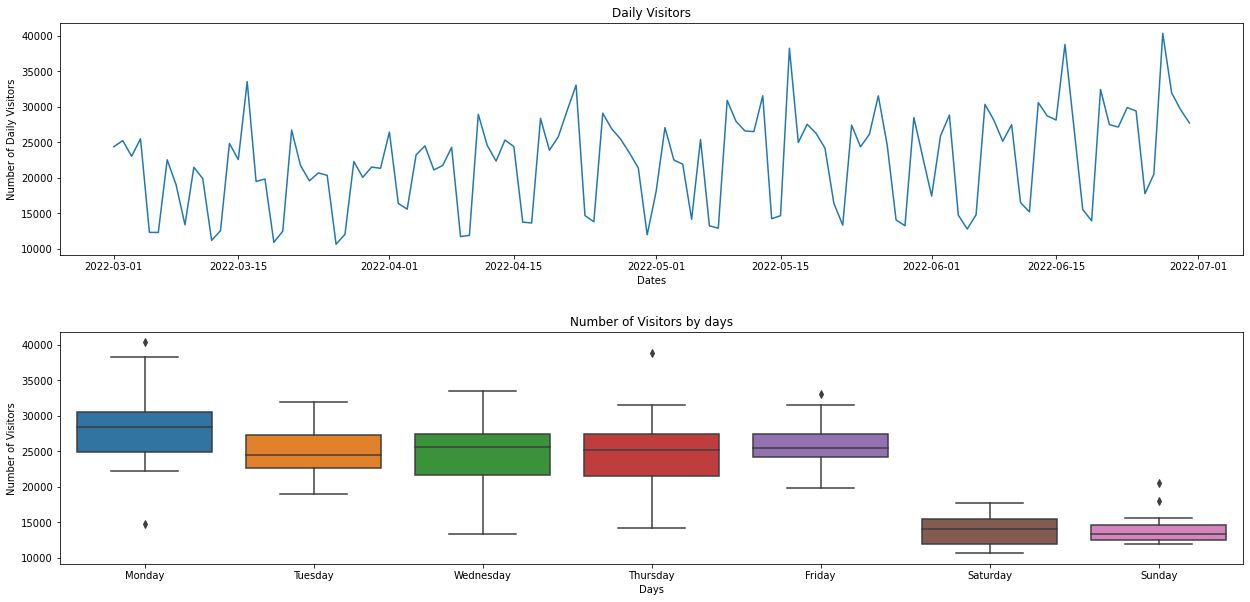

In [8]:
#Daily Visitors
print('Daily Visitor Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visitors'].describe())
print('-'*50)
print('Visitor Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['timestamp'].dt.day_name())['Number_of_daily_visitors'].describe())

#Plotting number of daily visitors
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='timestamp',
              y='Number_of_daily_visitors',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['timestamp'].dt.dayofweek,
            y='Number_of_daily_visitors',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visitors by days')
plt.ylabel('Number of Visitors')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Conversion Rates Statistics
--------------------------------------------------
count      122.00
mean    15,523.89
std      5,532.30
min      7,020.00
25%      8,758.75
50%     17,470.00
75%     19,580.75
max     26,340.00
Name: conversion_rate, dtype: float64
--------------------------------------------------
Conversion Rates Statistics by Dates
--------------------------------------------------
           count      mean      std       min       25%       50%       75%  \
timestamp                                                                     
Friday     17.00 16,711.06 1,368.16 14,203.00 15,739.00 16,941.00 17,562.00   
Monday     17.00 21,440.24 3,905.26  9,311.00 20,853.00 21,846.00 23,522.00   
Saturday   17.00  7,797.71   507.49  7,063.00  7,468.00  7,667.00  8,239.00   
Sunday     17.00  7,982.24   646.88  7,020.00  7,494.00  7,903.00  8,439.00   
Thursday   18.00 17,677.22 2,821.03  8,989.00 16,292.00 18,125.50 19,168.00   
Tuesday    18.00 18,864.28 2,659.08 11,857.00 1

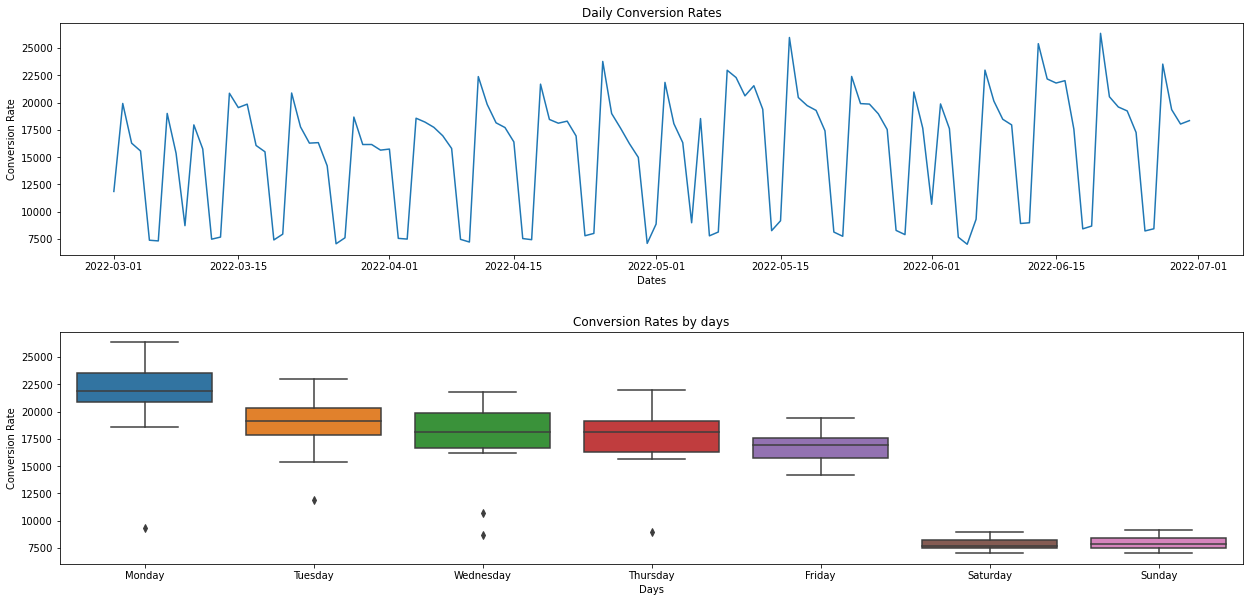

In [9]:
#Conversion rates
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('-'*50)
print('Conversion Rates Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['timestamp'].dt.day_name())['conversion_rate'].describe())

#Plotting convergance rates
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='timestamp',
              y='conversion_rate',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Conversion Rates')
plt.ylabel('Conversion Rate')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['timestamp'].dt.dayofweek,
            y='conversion_rate',
            data=daily_summary_table,
           ax=ax2)
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

In [10]:
#creating a customer table

#Filtering sales activities
sales_filter=dataset['event']=='EndLoanApply'
Customer_table=dataset.loc[sales_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
                                                                     total_event=('event','count')
                                                                     ).reset_index()

In [11]:
#Calculating number of customers who bought something
Number_of_customers_who_bought_smt=Customer_table['user_id'].nunique()
print('There are {:,.0f} customers.'.format(Number_of_customers_who_bought_smt))

#Calculating number of purchase activities for each customer
print('-'*50)
print('Distribution of Customer by Number of Purchases')
print(Customer_table['number_of_purchases'].value_counts(normalize=True).head(10))
#Calculationg repeat customers number
print('-'*50)
more_than_one_purchase_filter=Customer_table['number_of_purchases']>1
Number_of_customers_who_bought_more_than_once=Customer_table.loc[more_than_one_purchase_filter].shape[0]
print('There are {:,.0f} repeat customers, who bought more than once.'.format(Number_of_customers_who_bought_more_than_once))

There are 302,466 customers.
--------------------------------------------------
Distribution of Customer by Number of Purchases
1    0.20
2    0.14
3    0.12
4    0.08
5    0.06
6    0.05
7    0.04
8    0.03
9    0.03
10   0.02
Name: number_of_purchases, dtype: float64
--------------------------------------------------
There are 241,642 repeat customers, who bought more than once.


In [13]:
#Most valuable customers

#filtering customer with top %10 event count
top10perc_sales_amount=np.percentile(Customer_table['total_event'],90)
filter_top10perc_sales_amount=Customer_table['total_event']>=top10perc_sales_amount
top10perc_customers_with_hightest_turnover=Customer_table.loc[filter_top10perc_sales_amount]
regular_customers=Customer_table.loc[~filter_top10perc_sales_amount]

#calculating descriptive statistics
print('Top 10% customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(top10perc_customers_with_hightest_turnover['total_event'].describe())
print('-'*50)
total_sales_amount=Customer_table['total_event'].sum()
print('total_events: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10perc=top10perc_customers_with_hightest_turnover['total_event'].sum()
print('total_event of top 10% customers: {:,.0f}'.format(total_sales_amount_top10perc))

#calculating descriptive statistics
print('Regular customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(regular_customers['total_event'].describe())
print('-'*50)
total_sales_amount_regular_customers=regular_customers['total_event'].sum()
print('total_event of regular customers: {:,.0f}'.format(total_sales_amount_regular_customers))

Top 10% customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count   30,684.00
mean        42.47
std         38.19
min         21.00
25%         25.00
50%         32.00
75%         46.00
max      2,453.00
Name: total_event, dtype: float64
--------------------------------------------------
total_events: 2,715,253
total_event of top 10% customers: 1,303,267
Regular customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count   271,782.00
mean          5.20
std           4.65
min           1.00
25%           2.00
50%           3.00
75%           7.00
max          20.00
Name: total_event, dtype: float64
--------------------------------------------------
total_event of regular customers: 1,411,986


Cluster Statistics
--------------------------------------------------
             count  mean   std   min   25%   50%   75%      max
cluster                                                        
0.00    161,504.00  2.12  1.07  1.00  1.00  2.00  3.00     4.00
1.00     33,092.00 15.22  2.53 12.00 13.00 15.00 17.00    20.00
2.00     77,186.00  7.32  1.93  5.00  6.00  7.00  9.00    11.00
3.00     30,684.00 42.47 38.19 21.00 25.00 32.00 46.00 2,453.00


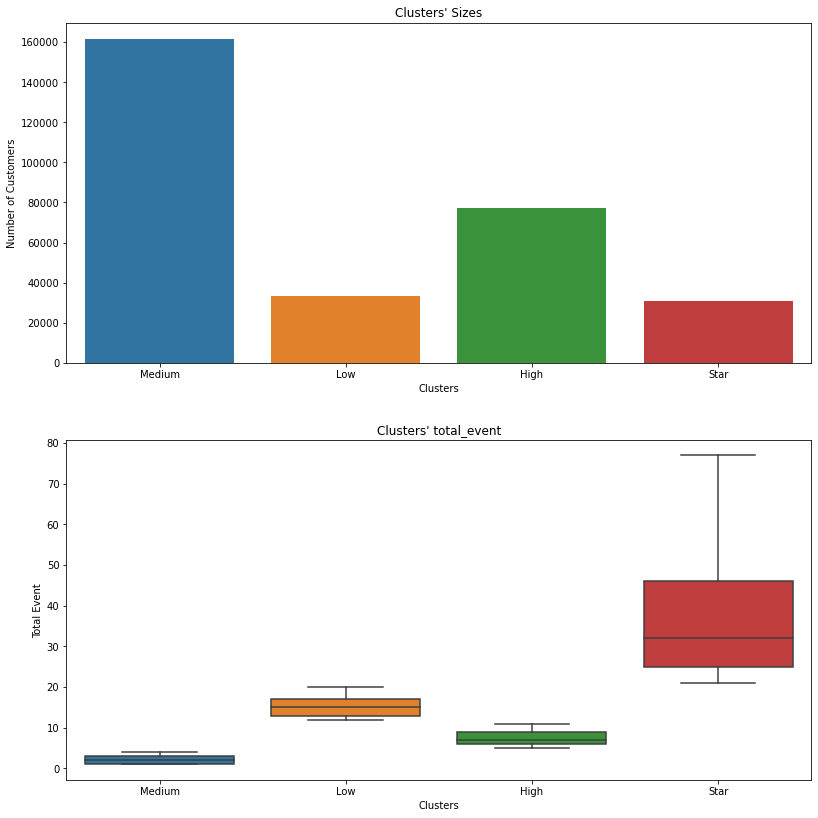

In [16]:
#creating subsegments from regular customers
from sklearn.cluster import KMeans
X=regular_customers['total_event'].values.reshape(-1,1)
regular_customers['cluster']=Clustering_KMeans=KMeans(n_clusters=3,random_state=15).fit_predict(X)

#merging clusters
Customer_table=pd.merge(left=Customer_table,
                        right=regular_customers[['user_id','cluster']],
                        how='left',
                        left_on='user_id',
                        right_on='user_id')
Customer_table['cluster'].fillna(3,inplace=True)

#Plotting the clusters
print('Cluster Statistics')
print('-'*50)
print(Customer_table.groupby(by=['cluster'])['total_event'].describe())

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,1,1)
sns.countplot(x='cluster',data=Customer_table,ax=ax1)
plt.xlabel('Clusters')
plt.ylabel('Number of Customers')
plt.title("Clusters' Sizes")
ax1.set_xticklabels(['Medium','Low','High','Star']);

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x='cluster',y='total_event',data=Customer_table,ax=ax2,showfliers = False)
plt.xlabel('Clusters')
plt.ylabel('Total Event')
plt.title("Clusters' total_event")
fig.tight_layout(pad=3.0)
ax2.set_xticklabels(['Medium','Low','High','Star']);

In [ ]:
#creating a filter for shoppers 
shopper_filter=dataset['event']=='EndLoanApply'
#using the filter to create shopper user list
shopper_list=dataset.loc[shopper_filter,['user_id']]
#distincting shopper customer list
distinct_shopper_df=pd.DataFrame(shopper_list['user_id'].unique(),columns=['user_id'])
#creating shopper dataset
dataset_shoppers=pd.merge(left=dataset,
                          right=distinct_shopper_df,
                          how='inner',
                          left_on=['user_id'],
                          right_on=['user_id']
                          )